In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train_df = pd.read_csv('../input/train.csv', index_col='Id')
test_df = pd.read_csv('../input/test.csv', index_col='Id')

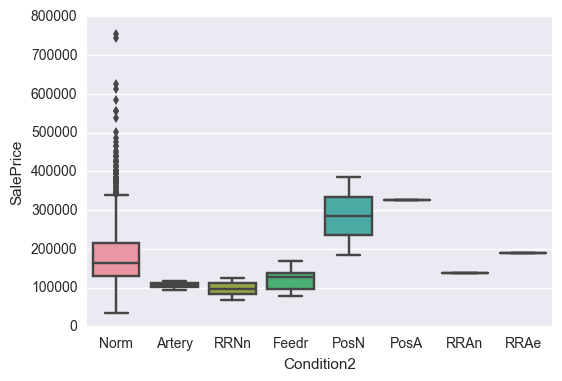

In [10]:
sns.boxplot(x='Condition2', y='SalePrice', data=train_df)

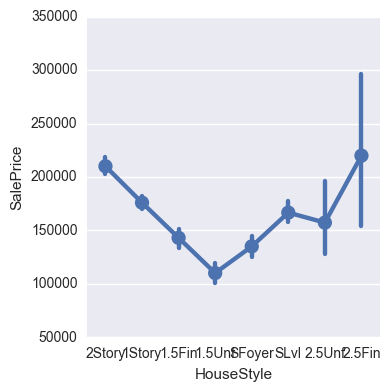

In [22]:
sns.factorplot(x='HouseStyle', y='SalePrice', data=train_df)

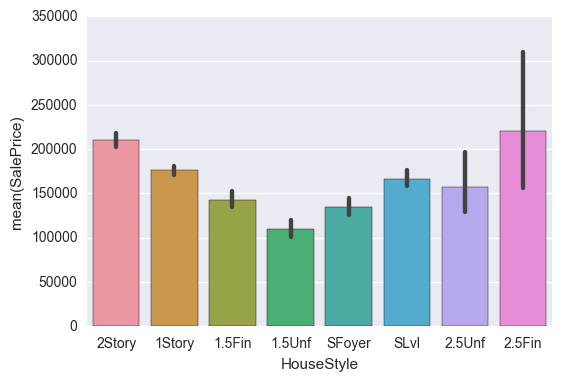

In [24]:
sns.barplot(x='HouseStyle', y='SalePrice', data=train_df)

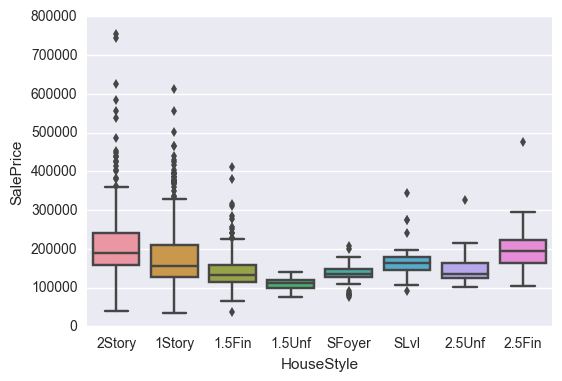

In [25]:
sns.boxplot(x='HouseStyle', y='SalePrice', data=train_df)

In [34]:
train_df[train_df.HouseStyle == '2Story']['2ndFlrSF'].mean()

880.2606741573034

In [39]:
flrArea = train_df['1stFlrSF'] + train_df['2ndFlrSF']

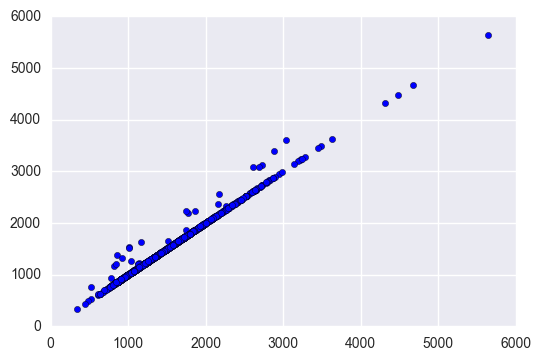

In [40]:
plt.scatter(flrArea, train_df.GrLivArea)

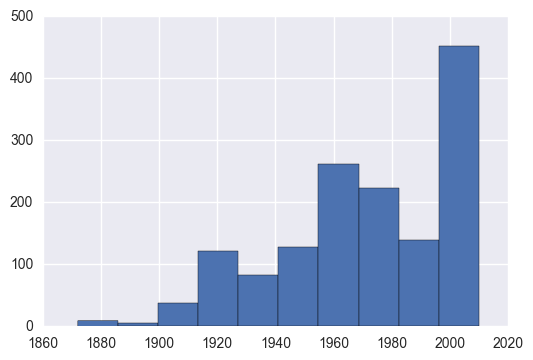

In [47]:
train_df.YearBuilt.hist()

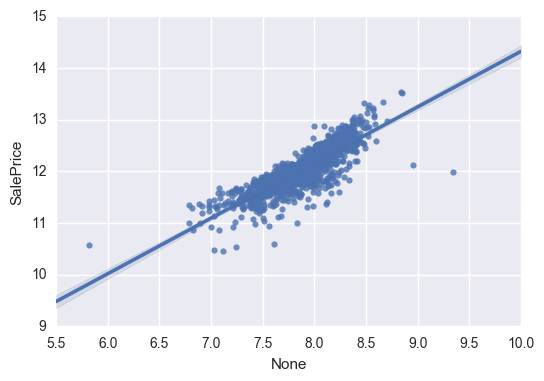

In [136]:
sns.regplot(np.log1p(flrArea + 0.7 * train_df.TotalBsmtSF + train_df.GarageArea), np.log1p(train_df.SalePrice))

In [113]:
from scipy.stats import pearsonr
rate = np.arange(0.1, 1.1, 0.1)
#print [(r, pearsonr(train_df.GrLivArea + r * train_df.TotalBsmtSF, train_df.SalePrice)[0]) for r in rate]
[(r, pearsonr(flrArea + r * train_df.TotalBsmtSF + train_df.GarageArea, np.log1p(train_df.SalePrice))[0]) for r in rate]

[(0.10000000000000001, 0.79377901104861381),
 (0.20000000000000001, 0.80246446294014162),
 (0.30000000000000004, 0.80863396648539276),
 (0.40000000000000002, 0.81272373462868086),
 (0.5, 0.8151167649693567),
 (0.59999999999999998, 0.81614156735916676),
 (0.70000000000000007, 0.81607497386563044),
 (0.80000000000000004, 0.81514713272947714),
 (0.90000000000000002, 0.81354739163455436),
 (1.0, 0.81143026155580433)]

In [135]:
from itertools import product
[(i, pearsonr(np.log1p(flrArea + i * train_df.TotalBsmtSF + train_df.GarageArea), np.log1p(train_df.SalePrice))[0]) for i in np.arange(0, 1.1, 0.1)]
    

[(0.0, 0.79696127609032896),
 (0.10000000000000001, 0.81041977997768444),
 (0.20000000000000001, 0.82084105757267478),
 (0.30000000000000004, 0.82861422538809315),
 (0.40000000000000002, 0.83411081283407562),
 (0.5, 0.83767442878977438),
 (0.60000000000000009, 0.83961499705656994),
 (0.70000000000000007, 0.84020656495751223),
 (0.80000000000000004, 0.8396876527418492),
 (0.90000000000000002, 0.83826324345229453),
 (1.0, 0.83610770632629317)]

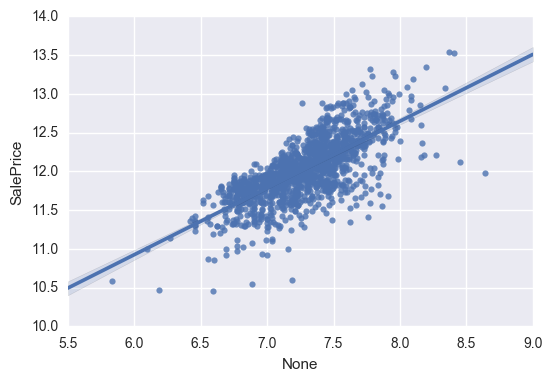

In [78]:
feat_trial = (np.log1p(train_df['1stFlrSF'] + train_df['2ndFlrSF']) + train_df['LowQualFinSF'] + train_df['GrLivArea']).copy()
feat_trial = np.log1p(feat_trial)
#matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# seaborn's regression plot (I liked it a lot. hence it found it's way here!)
sns.regplot(x=(feat_trial), y=np.log1p(train_df['SalePrice']), data=train_df, order=1);


In [79]:
pearsonr(feat_trial, train_df.SalePrice)

(0.68653282579310837, 4.855330976317709e-204)

In [151]:
object_feats = train_df.dtypes[train_df.dtypes == object].index
train_df[object_feats] = train_df[object_feats].fillna('NA')

In [170]:
qual = ['ExterQual', 'BsmtQual', 'KitchenQual', 'GarageQual']
cond = ['ExterCond', 'BsmtCond', 'GarageCond']
train_qual = train_df[qual]
train_cond = train_df[cond]

In [155]:
print train_qual.ExterQual.unique()
print train_qual.BsmtQual.unique()
print train_qual.KitchenQual.unique()
print train_qual.GarageQual.unique()

['Gd' 'TA' 'Ex' 'Fa']
['Gd' 'TA' 'Ex' 'NA' 'Fa']
['Gd' 'TA' 'Ex' 'Fa']
['TA' 'Fa' 'Gd' 'NA' 'Ex' 'Po']


In [160]:
print train_cond.ExterCond.unique()
print train_cond.BsmtCond.unique()
print train_cond.GarageCond.unique()

['TA' 'Gd' 'Fa' 'Po' 'Ex']
['TA' 'Gd' 'NA' 'Fa' 'Po']
['TA' 'Fa' 'NA' 'Gd' 'Po' 'Ex']


In [172]:
grade = {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'NA' : 0}
train_qual = train_qual.apply(lambda x : x.map(grade))
train_cond = train_cond.apply(lambda x : x.map(grade))

In [193]:
cond_qual = train_qual.join(train_cond).join(train_df.OverallCond).join(train_df.OverallQual)
cond_qual.shape

(1460, 9)

In [197]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(cond_qual, np.log1p(train_df.SalePrice))
cond_qual_score = lr.predict(cond_qual)

(0.85161899608608194, 0.0)

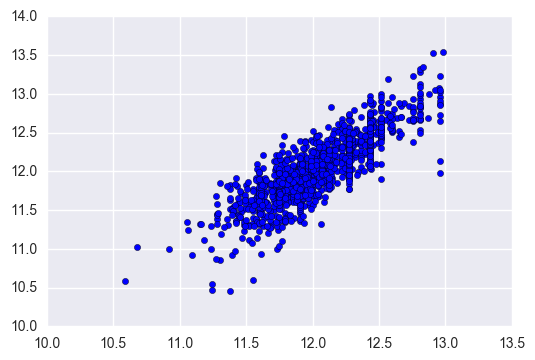

In [199]:

plt.scatter(cond_qual_score, np.log1p(train_df.SalePrice))
pearsonr(cond_qual_score, np.log1p(train_df.SalePrice))